# Pronostico de la inflación para el mes de octubre del 2022 en Mexico
## Elias Villaseñor Flores
## 1735689
## Estadistica Aplicada
## Grupo 051

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import kpss

%matplotlib inline

# Utilizare todos los datos, desde enero de 1970 hasta septiembre del 2022 debido a que siento que entre mas datos, mejor pronosticado debe estar

In [47]:
inflacion_mex = pd.read_excel('InflacionMexico.xlsx', index_col='fecha', parse_dates=True)

In [5]:
inflacion_mex

,Inflación
fecha,
1970-01-01,5.20
1970-02-01,4.81
1970-03-01,5.01
1970-04-01,4.87
1970-05-01,5.09
...,...
2022-05-01,7.65
2022-06-01,7.99
2022-07-01,8.15


### 3. Graficar inflacion de USA

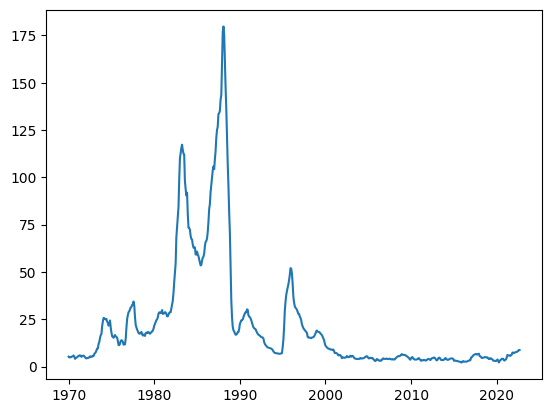

In [7]:
plt.plot(inflacion_mex)
plt.show()

### 4. Identificar si la estacion de USA es un proceso estacionario (sirve para hacer pronostico)

In [8]:
result_adf = adfuller(inflacion_mex)
alpha = .05
if result_adf[1]<alpha:
    print(f'La serie es estacionaria, con p-value {result_adf[1]}')
else:
    print(f'La serie es NO estacionaria, con p-value {result_adf[1]}')

La serie es estacionaria, con p-value 0.04597014933353394


### 5. Tenemos que identificar que tipo de proceso estacionario es

C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


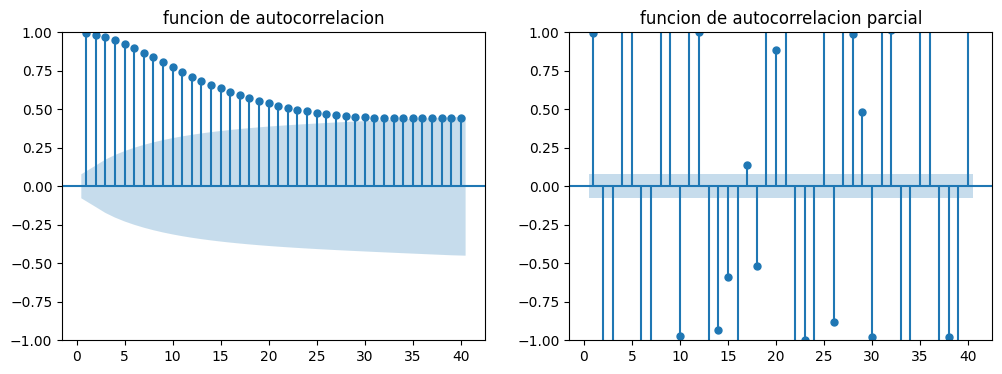

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

plot_acf(inflacion_mex, zero=False, lags=40, ax= ax[0], title='funcion de autocorrelacion')
ax[0].set_ylim(-1,1)

plot_pacf(inflacion_mex, zero=False, lags=40, ax= ax[1], title='funcion de autocorrelacion parcial')
ax[1].set_ylim(-1,1)

plt.show()

**Diferencia estacional de la serie original de inflación**

In [10]:
inflacion_mex_diff = inflacion_mex.diff(12).dropna()

In [12]:
result_adf = adfuller(inflacion_mex_diff)

alpha=0.05
if result_adf[1] < alpha:
    print("Se rechaza Ho, la serie es estacionaria")
else:
    printnt("No se rechaza Ho, la serie es no estacionaria")

Se rechaza Ho, la serie es estacionaria


C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


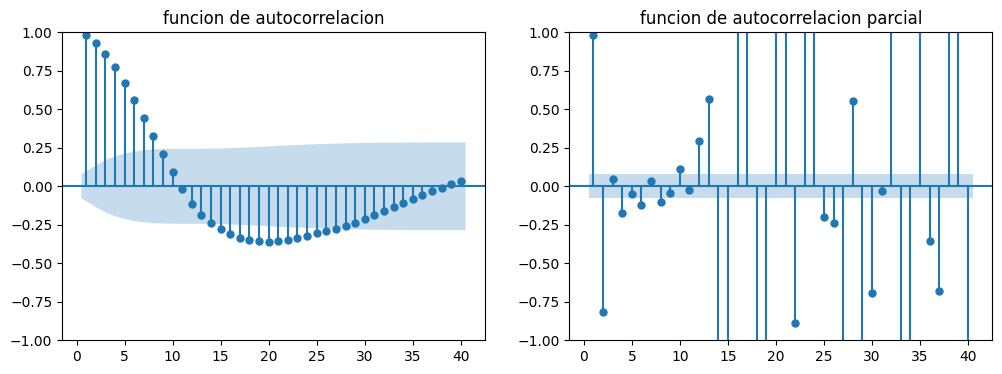

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

plot_acf(inflacion_mex_diff, zero=False, lags=40, ax= ax[0], title='funcion de autocorrelacion')
ax[0].set_ylim(-1,1)

plot_pacf(inflacion_mex_diff, zero=False, lags=40, ax= ax[1], title='funcion de autocorrelacion parcial')
ax[1].set_ylim(-1,1)

plt.show()

In [ ]:
# Resagos significativos 2, 12, 13, 25, 26, 28, 30, 36 y 37. lo anterior nos indica un fuerte componente estacional de la serie de tiempo y 
# debemos estimar un modelo SARIMA (ARIMA estacional)
# SARIMA(P, I, q)(P, I, Q)m

In [15]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

**compararemos el AIC de 3 procesos, los cuales seran un ARIMA(2,2), ARIMA(3,3) y un AR(2,2)**

In [35]:
model = ARIMA(inflacion_mex_diff, order=(3,0,3))
results = model.fit()
print(results.summary())

C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Inflación   No. Observations:                  621
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1563.036
Date:                Tue, 08 Nov 2022   AIC                           3142.071
Time:                        21:34:29   BIC                           3177.522
Sample:                    01-01-1971   HQIC                          3155.850
                         - 09-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      2.741      0.012      0.991      -5.340       5.404
ar.L1          2.0017      0.484      4.140      0.000       1.054       2.949
ar.L2         -1.1351      0.900     -1.261      0.2

In [48]:
model = ARIMA(inflacion_mex_diff, order=(2,0,0))
results = model.fit()
print(results.summary())

C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Inflación   No. Observations:                  621
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1574.523
Date:                Tue, 08 Nov 2022   AIC                           3157.046
Time:                        21:47:38   BIC                           3174.772
Sample:                    01-01-1971   HQIC                          3163.936
                         - 09-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0505      3.945      0.013      0.990      -7.682       7.782
ar.L1          1.7144      0.012    147.874      0.000       1.692       1.737
ar.L2         -0.7497      0.013    -59.280      0.0

In [36]:
model = ARIMA(inflacion_mex_diff, order=(2,0,2))
results = model.fit()
print(results.summary())

C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Inflación   No. Observations:                  621
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1563.517
Date:                Tue, 08 Nov 2022   AIC                           3139.034
Time:                        21:34:54   BIC                           3165.622
Sample:                    01-01-1971   HQIC                          3149.368
                         - 09-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0495      2.694      0.018      0.985      -5.231       5.330
ar.L1          1.8736      0.014    138.056      0.000       1.847       1.900
ar.L2         -0.9020      0.013    -67.883      0.0

Proceso	AIC
ARMA(2,2)	3139.034
ARMA(3,3)	3142.071
AR(2)	3157.046
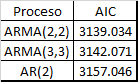

### Por lo tanto, el AIC menos es el del ARMA(2,2), ese será el que modelaremos.

In [37]:
residuales = results.resid

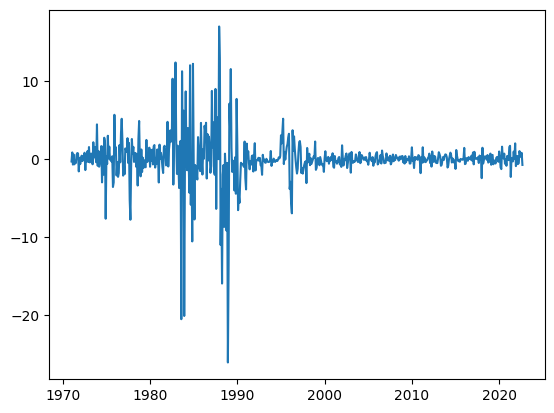

In [38]:
plt.plot(residuales);

C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


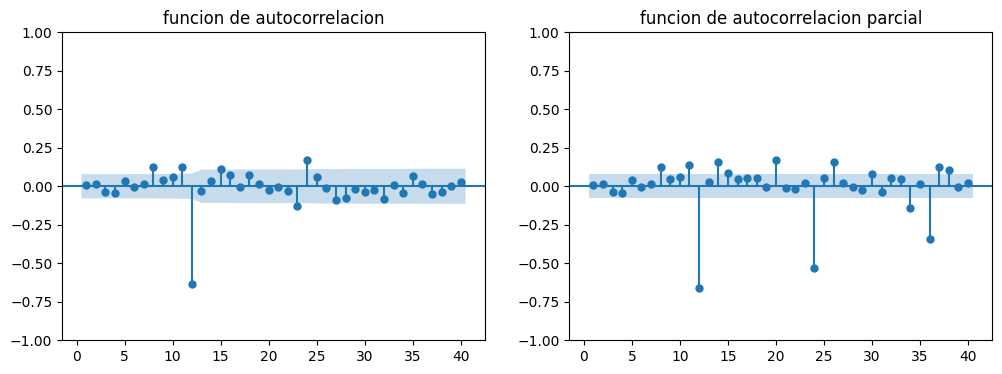

In [39]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

plot_acf(residuales, zero=False, lags=40, ax= ax[0], title='funcion de autocorrelacion')
ax[0].set_ylim(-1,1)

plot_pacf(residuales, zero=False, lags=40, ax= ax[1], title='funcion de autocorrelacion parcial')
ax[1].set_ylim(-1,1)

plt.show()

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
model = SARIMAX(inflacion_mex_diff, order=(2,0,2), seasonal_order=(2,0,2,12))
results = model.fit()
print(results.summary())

C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                          Inflación   No. Observations:                  621
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood               -1140.846
Date:                            Tue, 08 Nov 2022   AIC                           2299.692
Time:                                    21:38:08   BIC                           2339.574
Sample:                                01-01-1971   HQIC                          2315.193
                                     - 09-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8808      0.016    117.952      0.000       1.850       1.912
ar.L2         -0.8815      0.016   

In [44]:
model = SARIMAX(inflacion_mex, order=(2,0,2), seasonal_order=(2,0,2,12))
results = model.fit()
print(results.summary())

C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Elías\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                          Inflación   No. Observations:                  633
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood               -1127.112
Date:                            Tue, 08 Nov 2022   AIC                           2272.223
Time:                                    21:38:29   BIC                           2312.277
Sample:                                01-01-1970   HQIC                          2287.778
                                     - 09-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8802      0.016    121.232      0.000       1.850       1.911
ar.L2         -0.8809      0.016   

In [45]:
results.forecast(steph=1)

2022-10-01    8.682972
Freq: MS, dtype: float64

In [46]:
results.get_forecast(1).conf_int(alpha=0.05)

,lower Inflación,upper Inflación
2022-10-01,5.898966,11.466978


# Por lo tanto se espera que la inflación en el mes de octubre del 2022 en Mexico, seria aproximadamente del 8.68%